In [ ]:
!pip install tensorflow

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import multiprocessing
import functools
import numpy as np

In [2]:
def init(l):
    global lock
    lock = l

In [3]:
def read_img(img,name,id):
    pathimg = 'dataset4_image/ID_'+str(id)+'/0.jpg'
    image =  load_img(pathimg)
    image = img_to_array(image, dtype='float32')
    lock.acquire()
    img.append(image)
    name.append(id)
    lock.release()

In [4]:
if __name__ == '__main__':
    
    manager = multiprocessing.Manager()
    img_group = manager.list()
    name_group = manager.list()

    l = multiprocessing.Lock()

    id = list([1,2,5,7,9,11,15,26,28,39,42,47,48,50,56,61,65,67,68,69,72,79,90,94,97,98,101,105,110,111,115,119,123,125,128,133,137,139,141,142,143,144,148,149,153,154,155,156,168,171,172,178,180,181,182,184,187,189,192,194,195,198,201,202,204,208,209,210,211,213,215,219,223,225,227,228,229,230,231,233,242,243,245,247,248,251,253,255,256,257,259,261,266,268,270,272,274,277,279,280,282,283,286,287,289,291,292,298]) #change here

    partial_read_img = functools.partial(read_img, img_group, name_group)

    pool = multiprocessing.Pool(initializer=init, initargs=(l,))
    pool.map(partial_read_img, id)

In [5]:
pool.close()
pool.terminate()

In [6]:
img_group = np.array(img_group)
name_group = np.array(name_group)

In [7]:
name_group.shape

(108,)

In [9]:
del manager, l, id, read_img, partial_read_img, pool

NameError: name 'manager' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

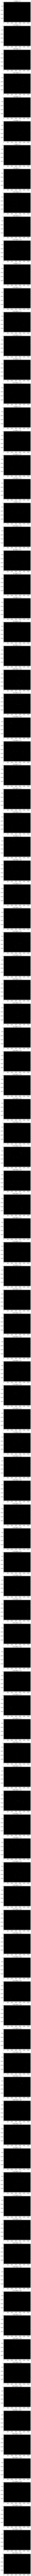

In [10]:
fig, ax_group = plt.subplots(nrows=108, figsize=(512,512))
a = 0
for idx_group, i_group in enumerate(img_group):
  ax_group[idx_group].imshow(i_group)
  ax_group[idx_group].set_title(str(name_group[idx_group]) + ' index = ' + str(a))
  a += 1

In [ ]:
np.argwhere(name_group == 248)